In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../players_22.csv")

/var/folders/5_/2y4z28sj70dd1l686776f_500000gn/T/ipykernel_69072/1955667029.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../players_22.csv")


In [3]:
data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [9]:
features = ["overall", "potential", "age","value_eur","wage_eur"]

In [12]:
players = data.dropna(subset=features)

In [13]:
data = data[features].copy()

In [14]:
data.head()

,overall,potential,age,value_eur,wage_eur
0,93,93,34,78000000.0,320000.0
1,92,92,32,119500000.0,270000.0
2,91,91,36,45000000.0,270000.0
3,91,91,29,129000000.0,270000.0
4,91,91,30,125500000.0,350000.0


In [15]:
data = ((data - data.min()) / (data.max() - data.min())) *9 + 1
data.head()

,overall,potential,age,value_eur,wage_eur
0,10.000000,9.608696,7.000000,4.618307,9.227468
1,9.804348,9.413043,6.333333,6.543654,7.939914
2,9.608696,9.217391,7.666667,3.087308,7.939914
3,9.608696,9.217391,5.333333,6.984396,7.939914
4,9.608696,9.217391,5.666667,6.822018,10.000000


In [21]:
def get_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [58]:
centroids = get_centroids(data,3)
centroids

/var/folders/5_/2y4z28sj70dd1l686776f_500000gn/T/ipykernel_69072/1643585641.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2
overall,5.108696,4.717391,5.108696
potential,6.282609,6.673913,3.934783
age,6.666667,3.666667,2.333333
value_eur,1.649097,1.064534,1.014660
wage_eur,1.038627,1.193133,1.012876


In [31]:
def get_labels(data,centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis = 1)))
    return distances.idxmin(axis=1)

In [72]:
def get_new_centroids(data,labels):
    return data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T


In [83]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

def plot_clusters(data,labels,centroids,iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], marker='.', s=200, c='red')
    plt.show()


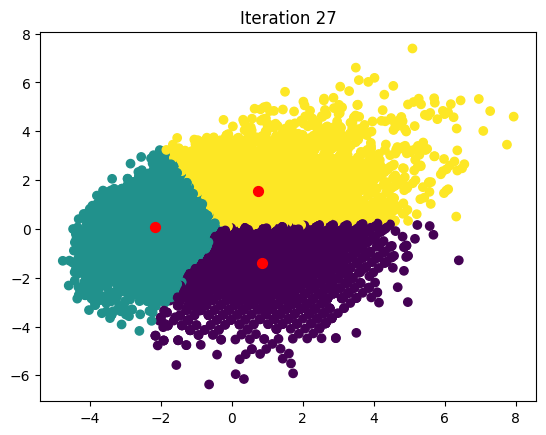

In [84]:
iteration = 0
old_centroid = pd.DataFrame()
centroid = get_centroids(data,3)
while iteration < 100 and not centroid.equals(old_centroid):
    old_centroid = centroid
    labels = get_labels(data,centroid)
    centroid = get_new_centroids(data,labels)
    plot_clusters(data,labels,centroid,iteration)
    iteration+=1

In [85]:
from sklearn.datasets import make_blobs

In [99]:
# Create 300 samples with 3 clusters and 2 features
X, y_true = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

In [100]:
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Label"] = y_true  # True label (optional)
print(df.head())

   Feature1  Feature2  Label
0 -7.338988 -7.729954      2
1 -7.740041 -7.264665      2
2 -1.686653  7.793442      0
3  4.422198  3.071947      1
4 -8.917752 -7.888196      2


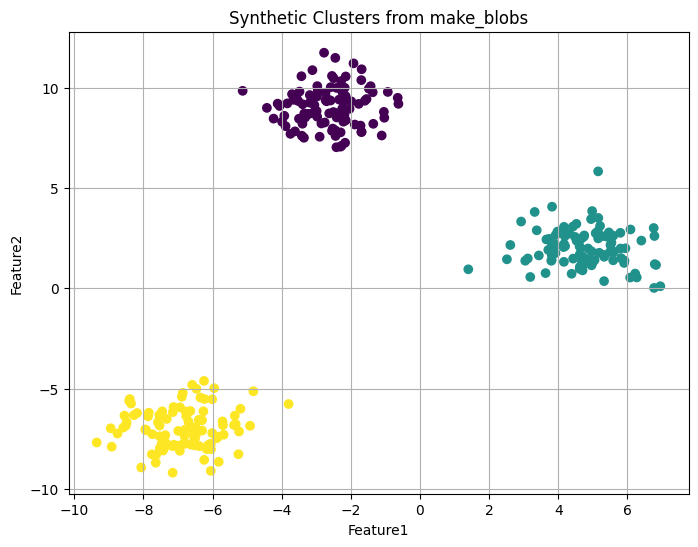

In [101]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Feature1"], df["Feature2"], c=df["Label"], cmap='viridis')
plt.title("Synthetic Clusters from make_blobs")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.grid(True)
plt.show()

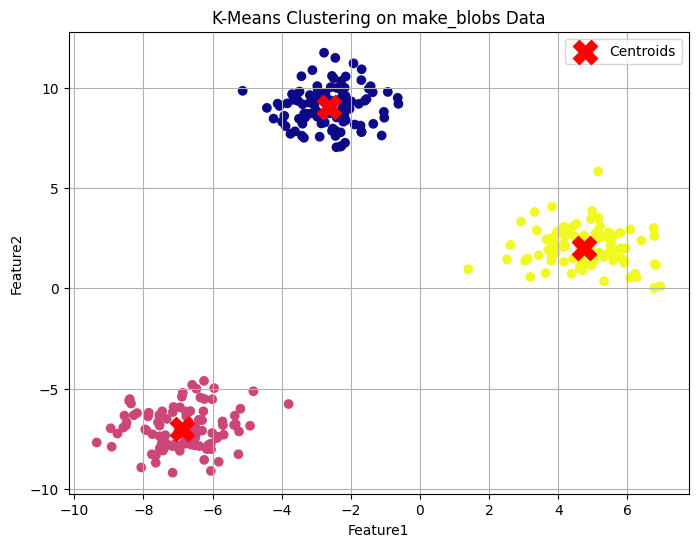

In [102]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Feature1", "Feature2"]])

# Plot the predicted clusters
plt.figure(figsize=(8, 6))
plt.scatter(df["Feature1"], df["Feature2"], c=df["Cluster"], cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering on make_blobs Data")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.grid(True)
plt.show()